# Calculating Age and Distance of NGC3201 using Isochrones
## <font color=purple> Science!
<font color=purple> Written by Maria Funcich 

In [1]:
import os
import numpy
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

## <font color=purple> HR Diagrams 

### <font color=purple> $\star$ Collecting the data set of magnitudes for each filter

In [2]:
cwd = os.getcwd()                         # saving current directory
os.chdir("../060_find_magnitudes/data")   # changing directory

file = open("magnitudes.csv", "r")        # opening the file (.csv) with all the calculated magnitudes

# reading lines of the document
lines = file.readlines()[1:]              # skipping the first line as it contains the heading (string)
lines_ = []
B = []                                    # creating empty arrays for each filter
V = []
R = []
I = []

for i in lines:
    lines_.append(i.strip())              # removing '\n' 
    
# note to self: data is represented as string
for x in lines_:
    B.append((x.split(',')[2]))           # adding all B magnitude data to array 'B'...
    V.append((x.split(',')[3]))
    R.append((x.split(',')[4]))
    I.append((x.split(',')[5]))
    
file.close()                              # close magnitudes.csv
os.chdir(cwd)                             # returning to the defined current directory

### <font color=purple> $\star$ Plotting HR diagram

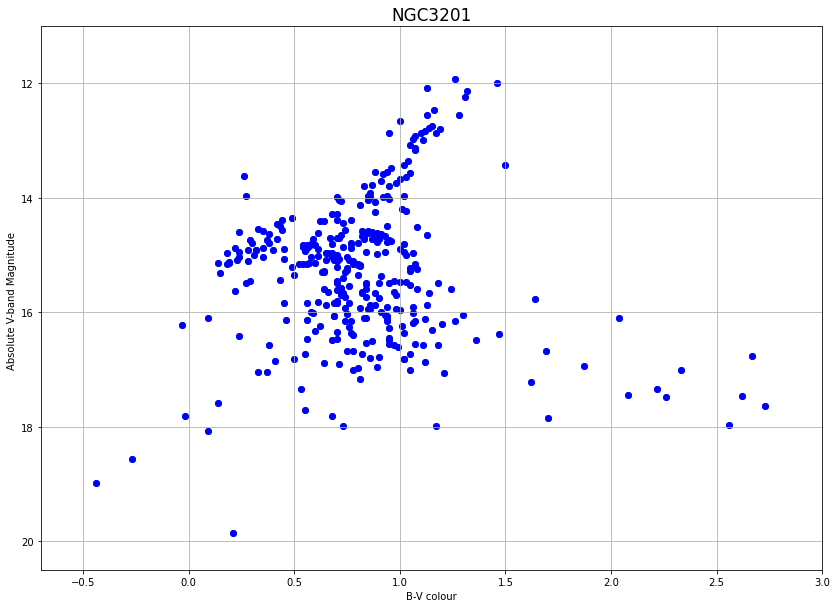

In [3]:
B_mag = []
V_mag = []

# removing rows that are empty (no magnitude for specific filter)
val = 0
for idx, a in enumerate(V):
    if V[idx] != '' and B[idx] != '':       # a null value is given by an empty string... therefore ignore ''
        B_mag.append(float(B[idx]))         # append the magnitude as a float value if both B and V mags are present
        V_mag.append(float(V[idx]))
        val = idx

# checking that it works and has only removed the necessary columns for both specified mags
#print(B_mag)
#print(V_mag)
#print(len(B_mag))
#print(len(V_mag))

BV = numpy.array(B_mag)-numpy.array(V_mag)  # colour: B minus V mags

# plotting HR 
plt.rcParams['figure.figsize'] = [14, 10]   # define plot size  

plt.axis([-0.7, 3, 20.5, 11])                 # axes ranges
plt.scatter(BV, V_mag)                      # scatter plot

ax = plt.gca()                          
ax.scatter(BV, V_mag, color = "b")

# axis labels
plt.rcParams.update({'font.size':14 })
plt.xlabel('B-V colour')          
plt.ylabel('Absolute V-band Magnitude ')
plt.title('NGC3201')
plt.grid(True)

plt.show()

<font color=purple> **Figure 1.** HR Diagram of NGC3201: is absent of a mainsequence, this is likely due to the fact that the faint stars weren't picked up
- We can see that there's a red giant branch, this works to our advantage as we can fit red giant isochrones to this.

### <font color=purple> $\star$ Creating function for magnitudes 

In [4]:
# function collects magnitudes for a pair of specific bands and only appends when magnitude is available for both
## 2 arguments --> band1: is minused from band2
##             --> band2: the band plotted on the y-axis

def magnitudes(band1, band2):
    band1_mag = []
    band2_mag = []

    val = 0
    for idx, a in enumerate(band1):
        if band1[idx] != '' and band2[idx] != '':
            band1_mag.append(float(band1[idx]))
            band2_mag.append(float(band2[idx]))
            val = idx
        
        colour = numpy.array(band1_mag) - numpy.array(band2_mag)
            
    return band2_mag, colour

In [5]:
# function creates colour magnitude diagrams (HR diagrams)
## 8 arguments --> band1: is minused from band2
##             --> band2: the band plotted on the y-axis
##             --> sb1, sb2: strings of the name band1 and band2... couldn't figure out how to implement the letter into a string :| 
##             --> x_min, x_max, y_min, y_max: axis scaling

def plot(band1, band2, sb1, sb2, x_min, x_max, y_min, y_max):
    mag = magnitudes(band1,band2)
    colour = mag[1]
    band2_mag = mag[0]

    # define plot size
    plt.rcParams['figure.figsize'] = [13, 10]

    plt.axis([x_min, x_max, y_min, y_max])               # Axes ranges
    plt.scatter(colour, band2_mag, color = 'b')            # Scatter plot

    #ax = plt.gca()
    #ax.scatter(colour, band2_mag, color = "b")

    # axis labels
    plt.rcParams.update({'font.size':14 })
    plt.xlabel('{}-{} colour'.format(sb1,sb2))          
    plt.ylabel('Absolute {}-band Magnitude'.format(sb2))
    plt.grid(True)

    #plt.show()

### <font color=purple> $\star$ Plotting HR Diagrams using different bands

In [6]:
#plot(B,V,"B","V",-0.7, 3, 20.5, 11)

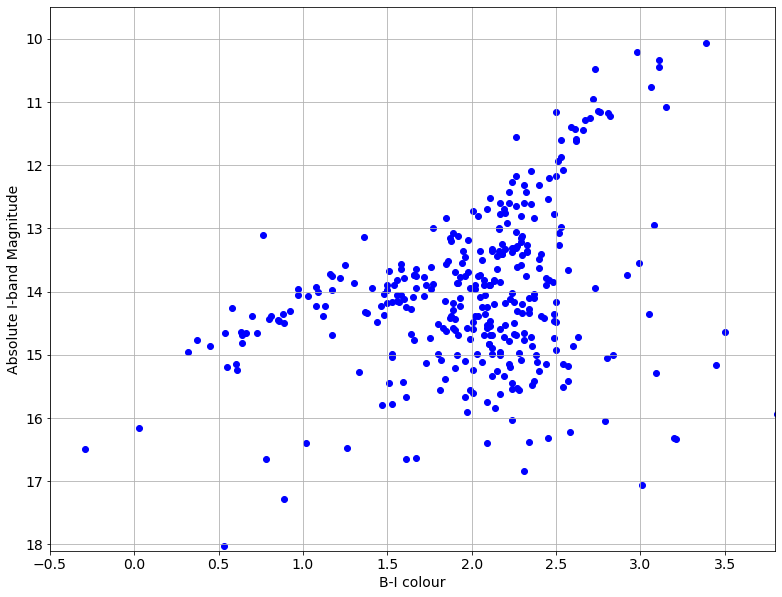

In [7]:
plot(B,I,"B","I",-0.5, 3.8, 18.1, 9.5)

<font color=purple> **Figure 2**: Absolute I-band magnitude as a function of (B-I) colour 

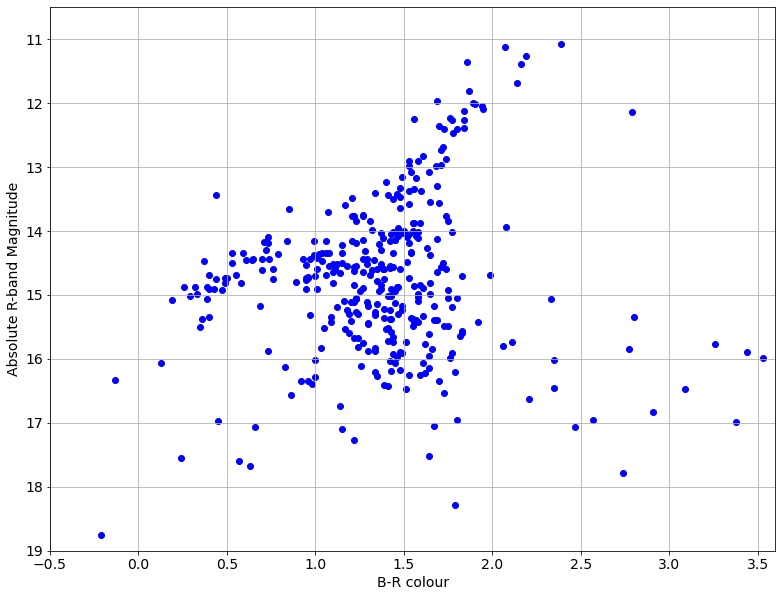

In [8]:
plot(B,R,"B","R",-0.5, 3.6, 19, 10.5)

<font color=purple> **Figure 3**: Absolute R-band magnitude as a function of (B-R) colour 

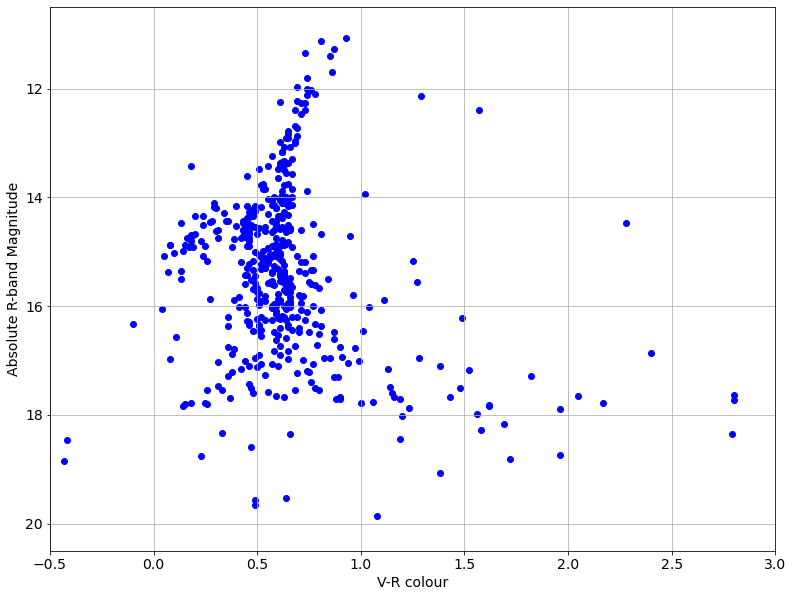

In [9]:
plot(V,R,"V","R",-0.5, 3, 20.5, 10.5)

<font color=purple> **Figure 4**: Absolute R-band magnitude as a function of (V-R) colour 

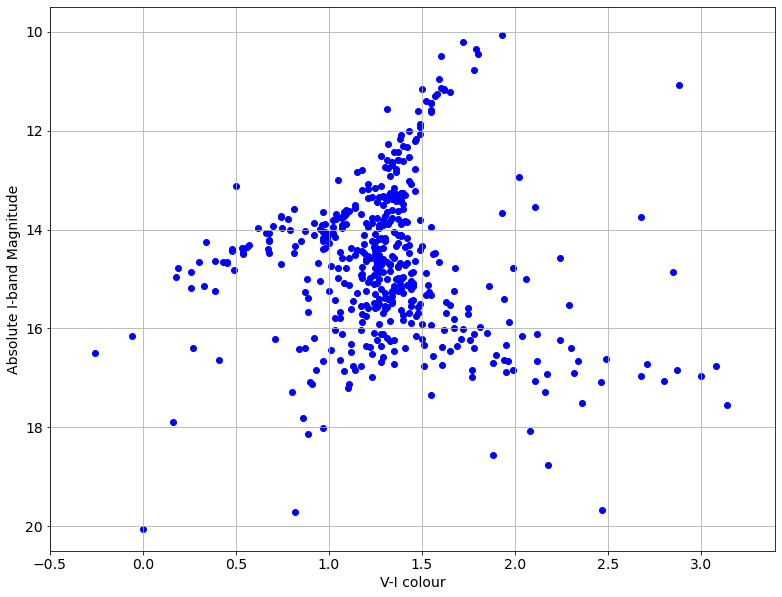

In [10]:
plot(V,I,"V","I",-0.5, 3.4, 20.5, 9.5)

<font color=purple> **Figure 5**: Absolute I-band magnitude as a function of (V-I) colour 

## <font color=purple> Giradi Isochrones

In [11]:
# function collects B and V magnitudes of the isochrone 
## 1 argument --> file_name: the file name of the isochrone

def isochrone(file_name):
    os.chdir("giradi isochrones")   
    fname = file_name

    f = open(fname,"r")
    lines = f.readlines()
    Bi = []
    Vi = []
    for x in lines:
        if x[0]!='#':
            Bi.append(float(x.split()[26]))
            Vi.append(float(x.split()[27]))
    f.close()
    os.chdir(cwd)

    BVi = numpy.array(Bi)-numpy.array(Vi)
    
    #print(B1)
    #print(V1)
    
    return Vi, BVi, Bi

### <font color=purple> $\star$ Plotting an isochrone
<font color=purple> Generating a Girardi isochrone for specific ages using: http://stev.oapd.inaf.it/cgi-bin/cmd <br>
    
<font color=purple> Layden et al. gives an estimate of ~13Gyrs, therefore will use this value to approximate a model isochrone to calculate distance. Also using metallicity of [F/H] = -1.53 as given by Layden as well.

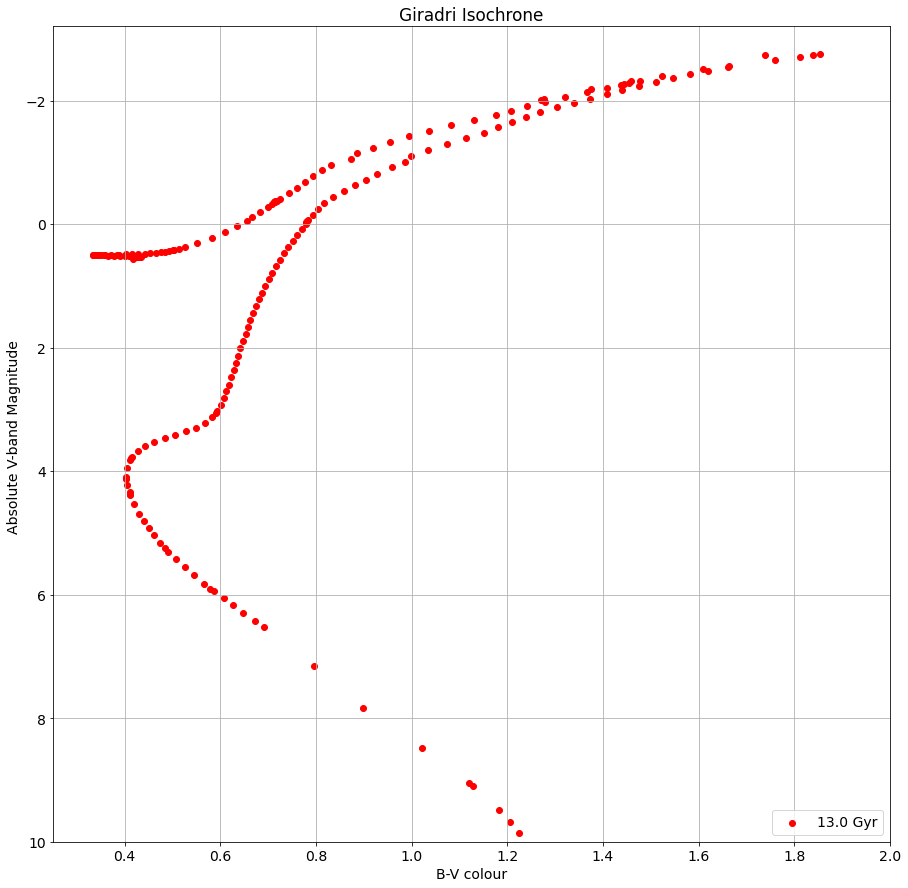

In [12]:
iso = isochrone('13Gyr.txt')

plt.rcParams['figure.figsize'] = [15, 15] # define plot size
plt.axis([0.25, 2, 10, -3.20])            # axes ranges

ax = plt.gca()
ax.scatter(iso[1], iso[0], color = "r", label = "13.0 Gyr")

# axis labels
plt.rcParams.update({'font.size':14 })
plt.xlabel('B-V colour')          
plt.ylabel('Absolute V-band Magnitude ')
plt.title('Giradri Isochrone')
plt.legend(loc='lower right');
plt.grid(True)

plt.show()

<font color=purple> **Figure 6**: Giradi isochrone with a metallicity of [F/H] = -1.53 (Layden et al. 2003) and an age of ~13Gyr

<font color=purple> Looks good, move on to plotting more...

### <font color=purple> $\star$ Plotting isochrone over NGC3201

<font color=purple> Using an estimated distance modulus that was calculated by 'eye' to fit isochrone over the HR diagram of NGC3201

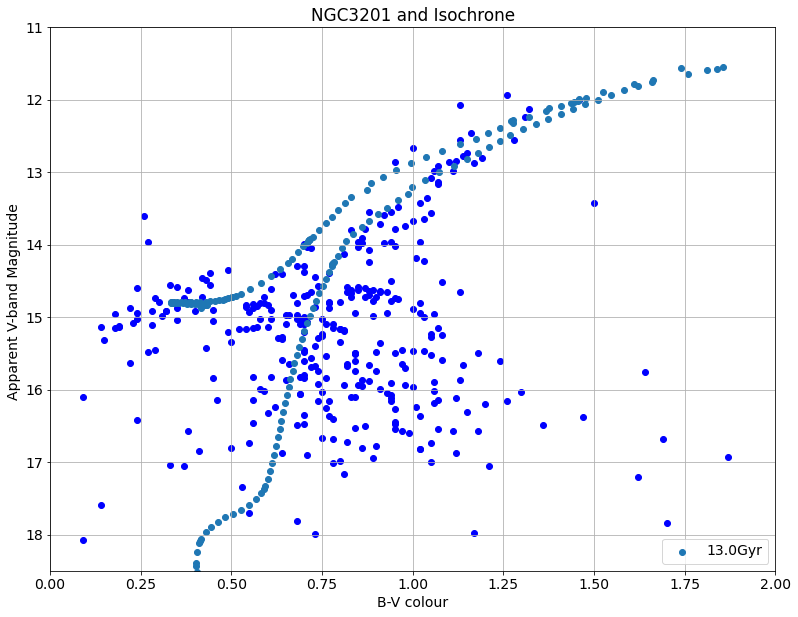

Distance: 7.244359600749905 kpc


In [13]:
plot(B,V,"B","V",0 , 2, 18.5, 11)

DM = 14.3                                      # distance modulus

V_DM = numpy.array(iso[0]) + DM                # adding distance modulus to the V magnitude of the isochrone
plt.scatter(iso[1], V_DM, label='13.0Gyr')     # scatter plot

# axis labels and grid
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('NGC3201 and Isochrone')
plt.grid(True)
plt.legend(loc='lower right')

plt.show()

# calculating distance
distance=(10.0**(DM/5))*10
print("Distance:", distance/1000, "kpc")

<font color=purple> **Figure 7**: Plotting 13.0Gyr isochrone over HR diagram and correcting with a distance modulus of 14.3, thus giving a distance of ~7.2kpc
<font color=purple> 
- The fit of the isochrone is not too bad
- The distance is ~2kpc greater than the expected literature values of ~5.1 ± 0.1 kpc (Monty et al. 2018). This is likely due to the dust/reddenning which we need to factor out to get a true value.

### <font color=purple> $\star$ Plotting various isochrones

In [14]:
# function plots isochrones
## 2 arguments --> filename: file name of isochrone
##             --> DM: distance modulus
##             --> age: age of isochrone

def plot_iso(file_name, DM, age):
    iso = isochrone(file_name)

    V_DM = numpy.array(iso[0])+DM
    ax = plt.gca()
    ax.scatter(iso[1], V_DM, label = age)                         # scatter plot
    
    # axis labels
    plt.xlabel('B-V colour')          
    plt.ylabel('Apparent V-band Magnitude ')
    plt.title('NGC3201 and Isochrone')
    plt.grid(True)
    plt.legend(loc='lower left')

Distance: 7.244359600749905 kpc


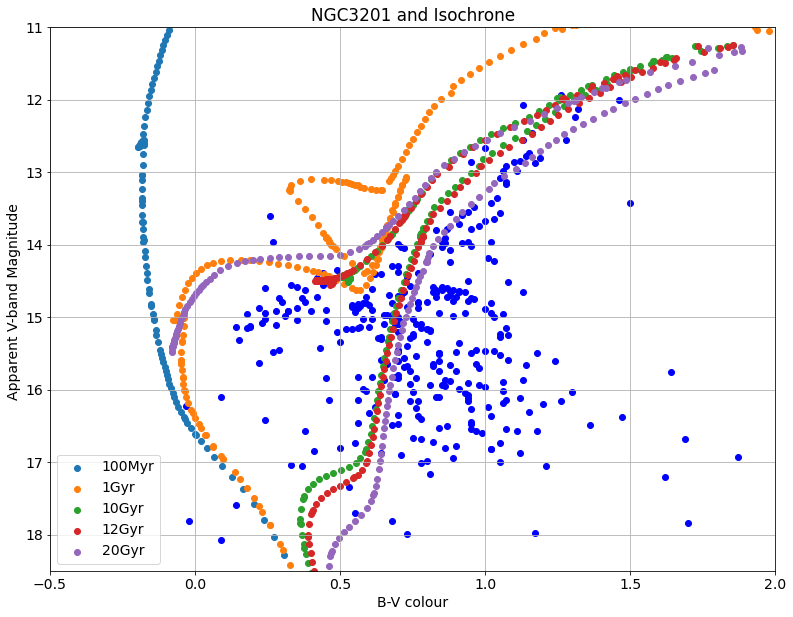

In [15]:
plot(B,V,"B","V",-0.5 , 2, 18.5, 11)
plot_iso('100Myr.txt', 14, '100Myr')
plot_iso('1Gyr.txt', 14, '1Gyr')
plot_iso('10Gyr.txt', 14, '10Gyr')
plot_iso('12Gyr.txt', 14, '12Gyr')
plot_iso('20Gyr.txt', 14, '20Gyr')

distance=(10.0**(DM/5))*10
print("Distance:", distance/1000, "kpc")

<font color=purple> **Figure 8**: Plotting isochrones of 100Myr, 1Gyr, 10Gyr, 12Gyr and 20 Gyr over NGC3201 using V-band against (B-V) colour

<font color=purple> By plotting 5 different aged isochrones we can get a good estimate of a good model for NGC3201.
- We can rule out 100Myr and 1Gyr as the red giant branches don't match as they are way off
    
- Using the distance modulus of 14 we get a distance of ~ 7.2kpc (this does not take into account dust/reddening)

## <font color=purple> Calculating distance by taking into account 'Dust'

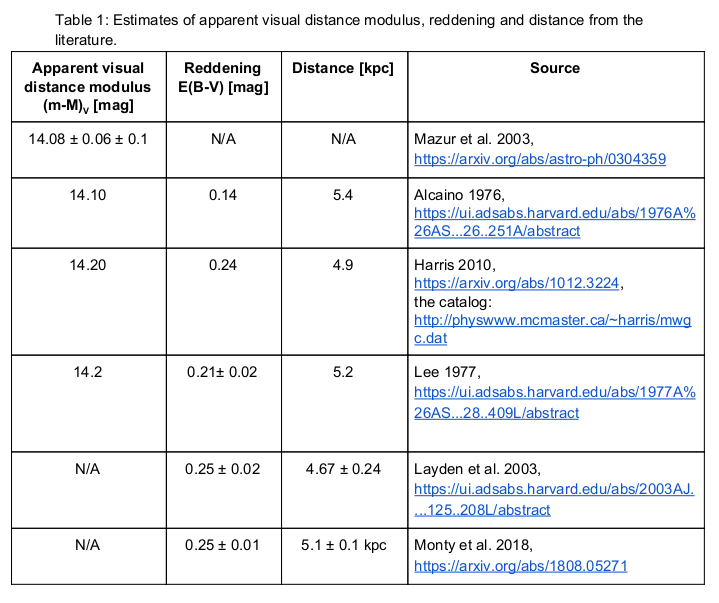

<font color=purple> 
### $\star$ Calculating true distance modulus to add reddening to isochrones <br> </font>
    
### <center> $ (m - M)_0 = (m - M)_V - R_VE(B - V) $ </center>
    
<font color=purple> 
Extracting values from literature given in 06_NGC_3201_factsheet. Reddenning is found in **Table 1** on the factsheet. We are using the values:
- $(m - M)_0$ our true distance modulus
- $(m - M)_V$ distance modulus, calculated by eye through shifting the magnitudes of the isochrones
- $R_V = 3.1$
- $E(B - V)$ is the extinction correction value (aka “reddening”) of the (B-V) colour
 - using $E(B - V)$ value of 0.25 as given by Monty et al. 2018

In [18]:
EBV = 0.25
RV = 3.1*EBV

def true_mod(file_name, DM, age):
    iso = isochrone(file_name)
    BV_M = numpy.array(iso[2])-numpy.array(iso[0])+EBV   # adding reddening value to (B - V) colour
    V_M = numpy.array(iso[0])+DM+RV                      # adding the distance modulus and R_V value to V magnitude

    # define plot size
    plt.rcParams['figure.figsize'] = [15, 15]
    plt.scatter(BV_M, V_M, label = age)                  # scatter plot

    # axis labels
    plt.rcParams.update({'font.size':14 })
    plt.xlabel('B-V colour')          
    plt.ylabel('Absolute V-band Magnitude ')
    plt.title('Giradri Isochrone')
    plt.legend(loc='upper right');
    plt.grid(True)
    
    # calculate new distance and print
    distance=(10.0**(DM/5))*10
    print("Distance:", distance/1000, "kpc")

<font color=purple> Changing the Distance modulus to now fit the 'reddened' isochrone magnitudes
 - The modulus now goes up by ~1 compared to the non reddened isochrones

Distance: 4.168693834703355 kpc
Distance: 4.168693834703355 kpc


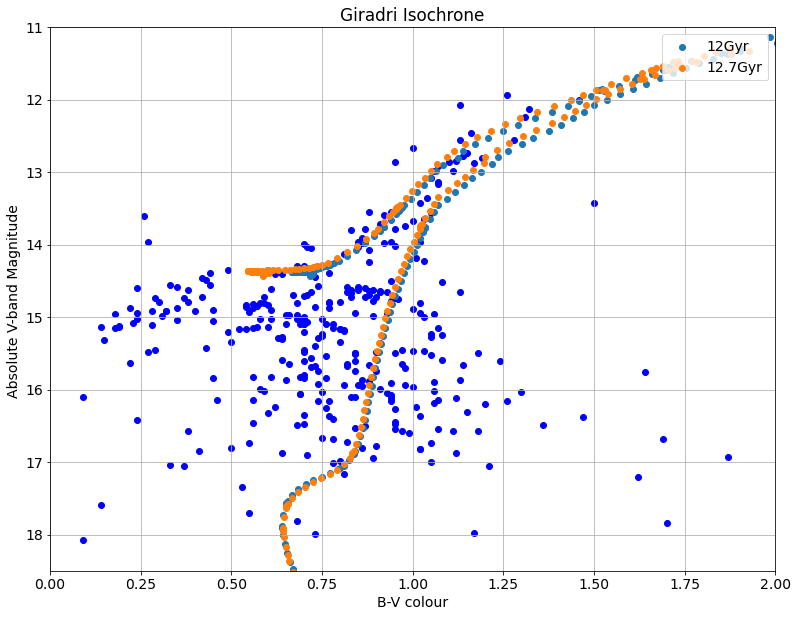

In [19]:
plot(B,V,"B","V",0 , 2, 18.5, 11)
true_mod('12Gyr.txt', 13.1, '12Gyr')
#true_mod('13Gyr.txt', 13.35, '13Gyr')
true_mod('12.7Gyr.txt', 13.1, '12.7Gyr')
#true_mod('15Gyr.txt', 13.35, '15Gyr')

<font color=purple> **Figure 9**:  Reddened Giradi Isochrones of ages 12 and 12.7Gyr. Reddening value used: $E(B - V) = 0.25$ giving a new $(m - M)_V = 13.1$ <br>
    
<font color=purple> Judging from this fitting, we can see that the shape of the red giant and horizontal branch don't line up very well. Looks like the magnitude colour needs to be shifted to the right to fit well...  However, the new distance calculated is ~4.2 kpc, this is at least near the literature values given in **Table 1** of the fact sheet. 

<font color=purple> 
### $\star$ Using other reddening values

Distance: 5.370317963702527 kpc
Distance: 5.370317963702527 kpc


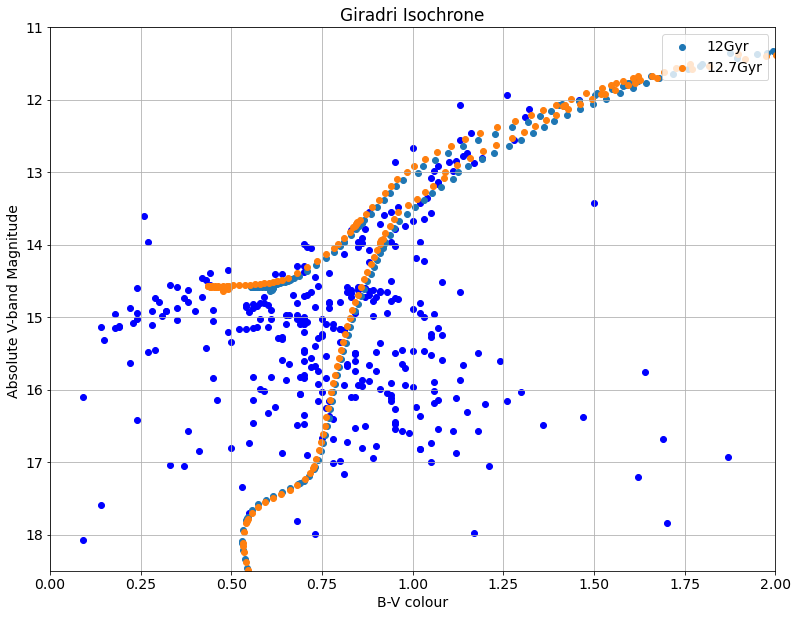

In [20]:
# using Alcaino 1976 value of reddening: 0.14
EBV = 0.14
RV = 3.1*EBV
plot(B,V,"B","V",0 , 2, 18.5, 11)
true_mod('12Gyr.txt', 13.65, '12Gyr')
true_mod('12.7Gyr.txt', 13.65, '12.7Gyr')
#true_mod('12.5Gyr.txt', 13.65, '13Gyr')

<font color=purple> **Figure 10**:  Reddened Giradi Isochrones of ages 12 and 12.7Gyr. Reddening value used: $E(B - V) = 0.14$ giving a new $(m - M)_V = 13.65$ <br>
    
<font color=purple> The value for $E(B-V)$ given by Alcaino 1976 found in **Table 1** makes a better fit for the giant branch, thus giving a distance value of ~5.4 kpc.
- Note that the value is the same to Alcaino 1976 value of ~5.4 kpc

## <font color=purple> NOTES
<font color=purple>

- Found that using a reddening value of 0.14 gives a more accurate shape to our isochrones when fitting on to our NGC3201 data
- Age of NGC3201 is ~ 12 to 12.7Gyr  
- Distance ~4.2 to 5.4kpc 